<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.

 **Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*

**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek
 

# Import libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score,  mean_absolute_error, root_mean_squared_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [2]:
# Import dataset
print("Loading dataset ...")
dataset = pd.read_csv("Walmart_Store_sales.csv")
print("Done ...")

dataset.shape


Loading dataset ...
Done ...


(150, 8)

There are 150 rows only. We do not have enough data

In [3]:
print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
display(dataset.describe(include='all'))
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

No feature has too many missing values but since Weekly Sales are our target, we will drop lines where target values are missing

In [805]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [4]:
dataset['Date'] = pd.to_datetime(dataset["Date"])
pd.to_datetime(dataset["Date"], format = "%Y-%m-%d %H:%M:%S")
dataset['Date'].dt.strftime("%d/%m/%Y %H:%M:%S")
dataset['Year']  = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day']   = dataset['Date'].dt.day
dataset['DayOfWeek'] = dataset['Date'].dt.weekday

# weekdays_dict = {
#     0: 'Monday',
#     1: 'Tuesday',
#     2: 'Wednesday',
#     3: 'Thursday',
#     4: 'Friday',
#     5: 'Saturday',
#     6: 'Sunday'
# }
# dataset.loc[:, "DayOfWeek"] = dataset["Date"].dt.dayofweek.map(weekdays_dict)

/var/folders/46/x42l_k2x3d70dgqvblqp27x00000gn/T/ipykernel_96265/1288615824.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Date'] = pd.to_datetime(dataset["Date"])


In [280]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936,2012.0,7.0,27.0,4.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0


In [ ]:
#days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
#dataset['Day'] = dataset['Day'].map(days)
#months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
#dataset['Month']= dataset['Month'].map(months)
#dataset.head()

In [807]:
dataset.nunique().sort_values()

DayOfWeek         1
Holiday_Flag      2
Year              3
Month            12
Store            20
Day              30
Date             85
Unemployment    104
Fuel_Price      120
Temperature     130
CPI             135
Weekly_Sales    136
dtype: int64

In [5]:
df = dataset.copy()

df_holiday = df.loc[df['Holiday_Flag']==1]
df_holiday['Date'].unique()

<DatetimeArray>
['2011-12-30 00:00:00', '2012-02-10 00:00:00',                 'NaT',
 '2010-02-12 00:00:00', '2012-09-07 00:00:00', '2010-12-31 00:00:00',
 '2010-11-26 00:00:00', '2010-09-10 00:00:00']
Length: 8, dtype: datetime64[ns]

These are the holidays in the dataset
Super Bowl: 12-Feb-10, 10-Feb-12
Labor Day: 10-Sep-10, 7-Sep-12
Thanksgiving: 26-Nov-10
Christmas: 31-Dec-10, 30-Dec-11

In [6]:
# Super bowl dates 
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates 
df.loc[(df['Date'] == '2010-11-26'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26'),'Thanksgiving'] = False

#Christmas dates 
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

df_not_holiday = df.loc[df['Holiday_Flag']==0]
df_not_holiday['Date'].nunique() 

74

In [ ]:
#dataset['Date'].head(5).append(dataset['Date'].tail(5)) # to see first and last 5 rows.

In [7]:
dataset.drop(['Date', "DayOfWeek"], axis=1, inplace=True)

In [8]:
target = 'Weekly_Sales'
features = [i for i in dataset.columns if i not in [target]]

nu = dataset[features].nunique().sort_values()
nf = []; 
cf = []; 

for i in range(dataset[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i]) # categorical features
    else: nf.append(nu.index[i]) # numerical features

print('The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

The Dataset has 4 numerical & 5 categorical features.


In [376]:
dataset.duplicated().sum()

0

# EDA Target Weekly sales

/var/folders/46/x42l_k2x3d70dgqvblqp27x00000gn/T/ipykernel_96265/1511798115.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


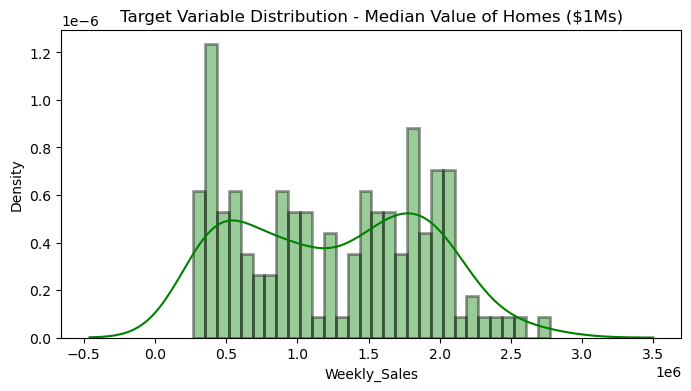

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[8,4])
sns.distplot(dataset[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()


The Target Variable seems to be normally distributed, with two maximum around 500k and 1,8M 

# EDA numerical features

                                                  Numeric Features Distribution                                                   


/var/folders/46/x42l_k2x3d70dgqvblqp27x00000gn/T/ipykernel_96265/2246933047.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
/var/folders/46/x42l_k2x3d70dgqvblqp27x00000gn/T/ipykernel_96265/2246933047.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please se

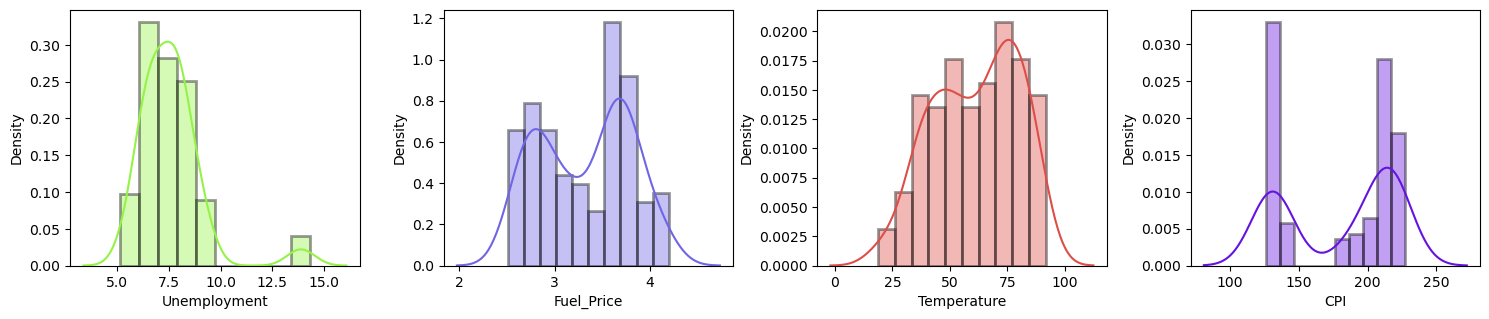

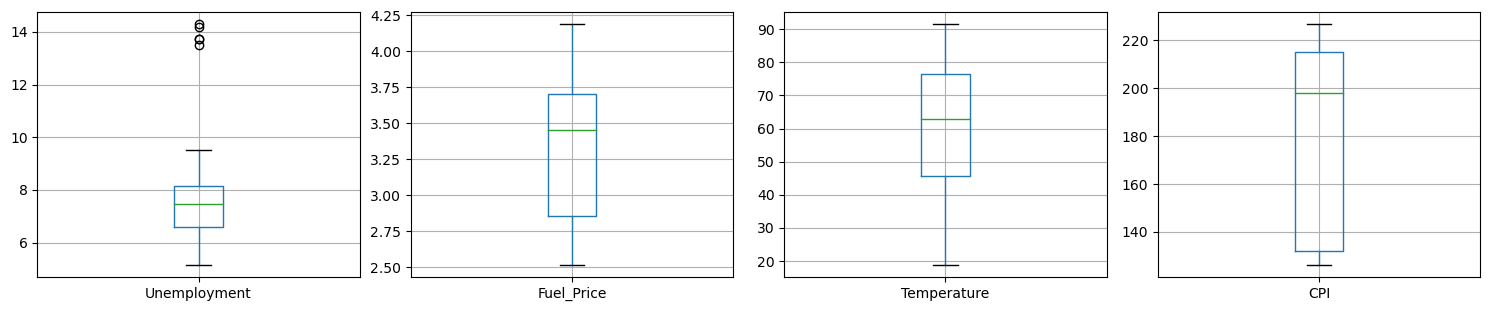

In [10]:
#Visualising the numeric features 
import math
print('Numeric Features Distribution'.center(130))

n=4
clr=['r','g','b','g','b','r']

plt.figure(figsize=[15, 6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(dataset[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    dataset.boxplot(nf[i])
plt.tight_layout()
plt.show()

Normal distributions. There are Outliers in Unemployment that we will remove later

In [868]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing
df.set_index('Date', inplace=True) #seting date as index

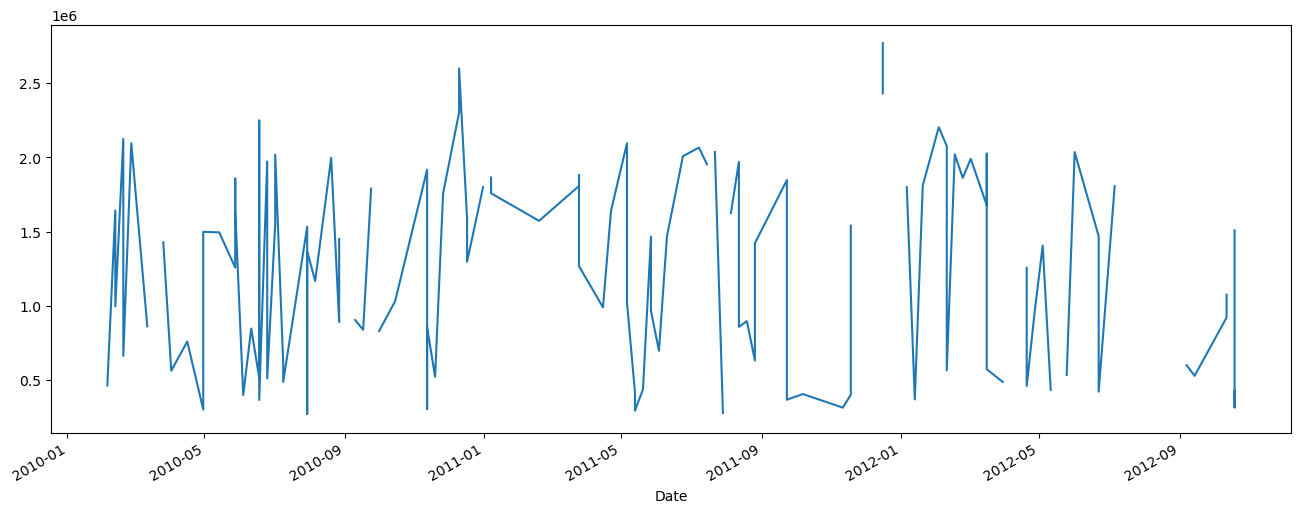

In [869]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

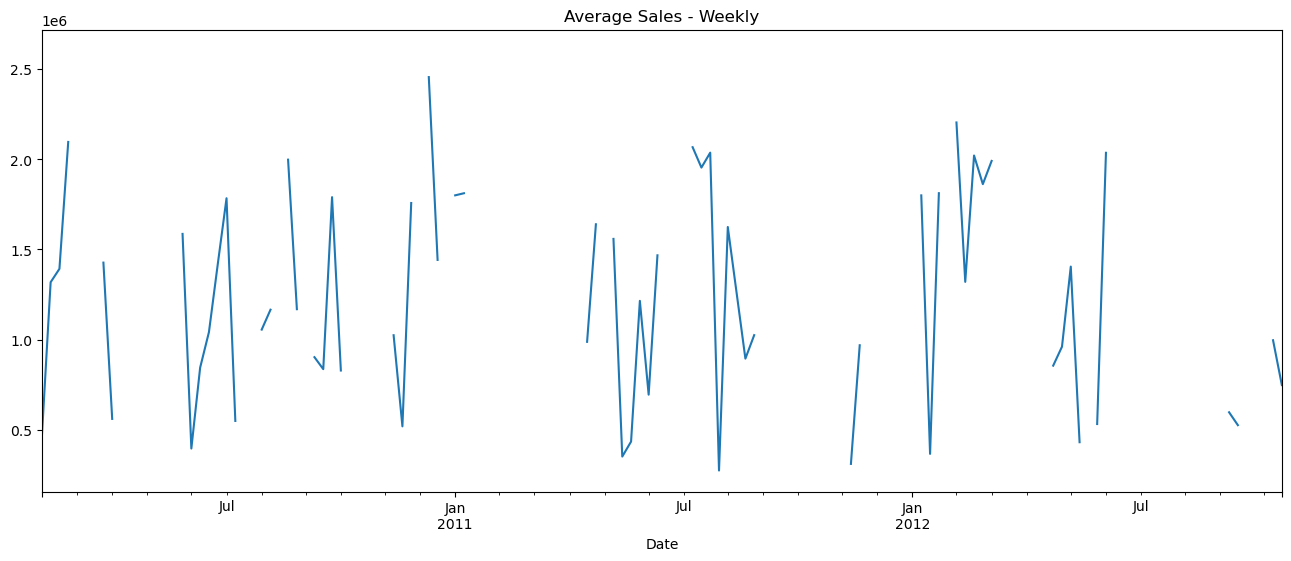

In [871]:
df_week = df.resample('W').mean() #resample data as weekly

plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

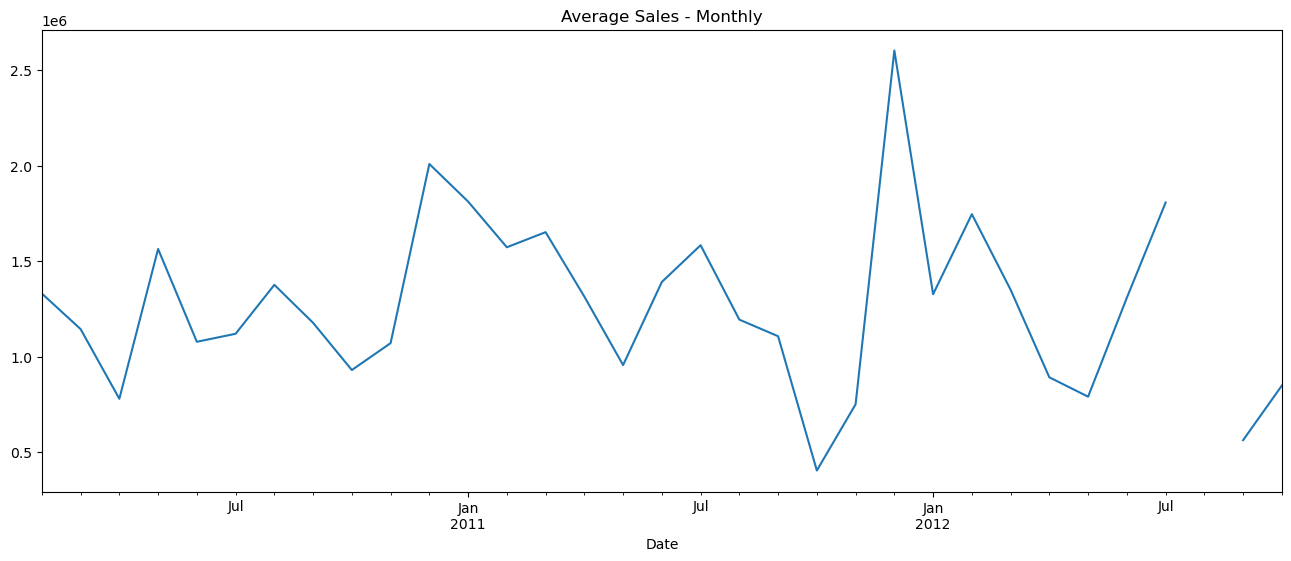

In [872]:
df_month = df.resample('MS').mean() # resampling as monthly
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()


There seems to be seasonality in weekly sales with maximum in december and minimum in october

In [11]:
#Unemployment contain outliers, lets remove

df1 = dataset.copy()

features1 = nf

for i in features1:
     Q1 = df1[i].quantile(0.25)
     Q3 = df1[i].quantile(0.75)
     IQR = Q3 - Q1
     df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
     df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
     df1 = df1.reset_index(drop=True)
display(df1.head())
print('Before removal of outliers, The dataset had {} samples.'.format(dataset.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0
2,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0
3,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0
4,20.0,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0


Before removal of outliers, The dataset had 150 samples.
After removal of outliers, The dataset now has 98 samples.


# EDA categorical features

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

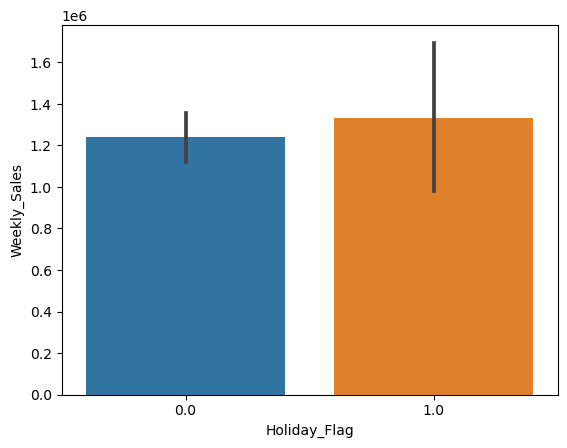

In [12]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

In [13]:
df6 = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
fig = px.pie(df6, names = "Holiday_Flag", values = "Weekly_Sales")
fig.show()

Holiday average sales are higher than normal dates.

# For Christmas

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice



<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

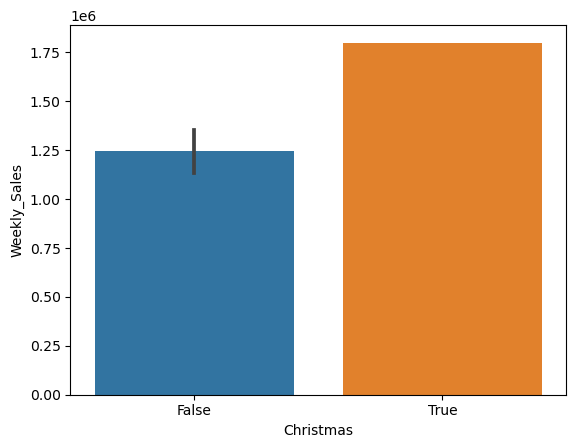

In [14]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

# For Thanksgiving

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

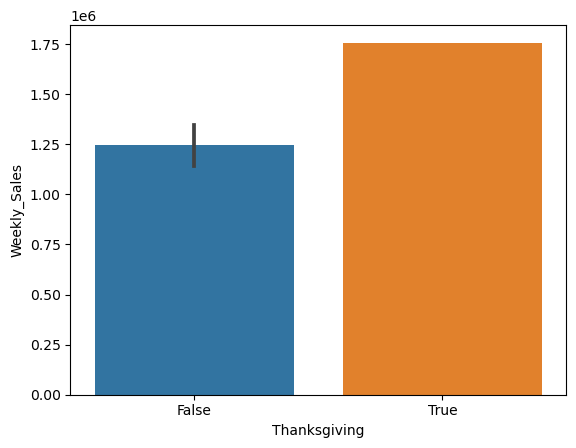

In [837]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) 

# For Super Bowl

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

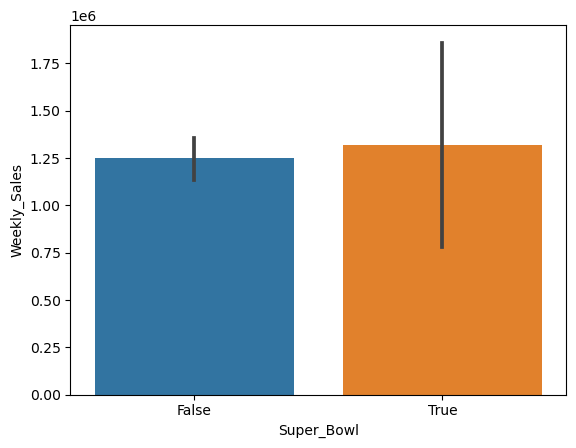

In [838]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)

# For Labor Day

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice



<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

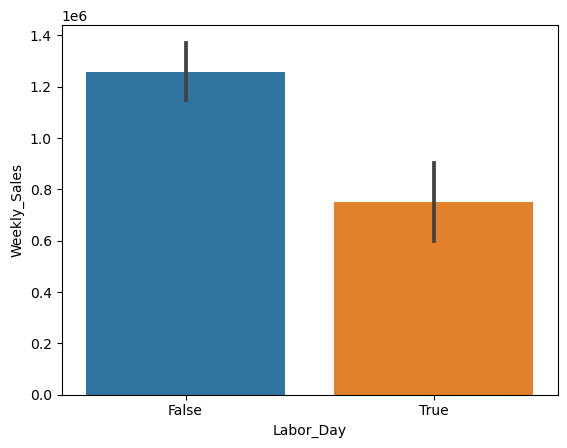

In [839]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

Labor Day does not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving and Christmas. People generally prefer/start to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

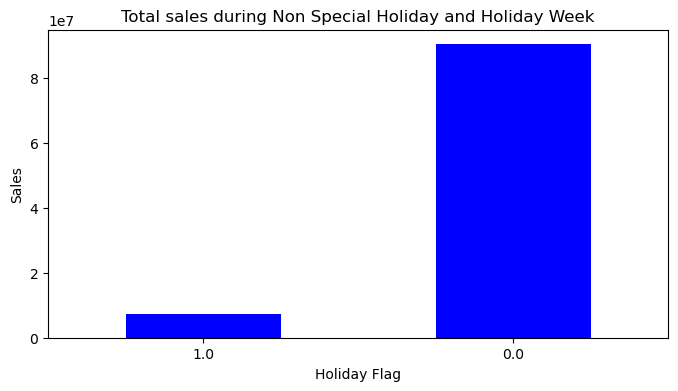

In [15]:
#Holiday = dataset['Holiday_Flag'].value_counts(normalize=True) * 100
Holiday = df1.groupby('Holiday_Flag')['Weekly_Sales'].sum().sort_values()

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
Holiday.plot(kind='bar', color=['blue'])#, 'orange'])
plt.title('Total sales during Non Special Holiday and Holiday Week')
plt.xlabel('Holiday Flag')
plt.ylabel('Sales')
plt.xticks(rotation=0)  
plt.show()
#print("Holiday Flag Distribution (Percentage):")
#print(Holiday)

([<matplotlib.patches.Wedge at 0x146b823d0>,
 [Text(-0.25795778443138245, -1.0693258537280639, 'Non Special Holiday Week'),
  Text(0.3283100985915524, 1.3609601313641797, 'Special Holiday Week')],
 [Text(-0.1407042460534813, -0.5832686474880348, '92.47%'),
  Text(0.21105649195171222, 0.8749029415912584, '7.53%')])

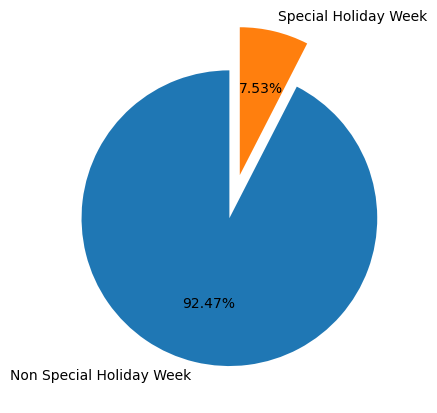

In [16]:
df4 = df1.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'], normalize = True \
        , autopct = '%1.2f%%', startangle = 90, explode = [0,0.3]) #,shadow=True,colors=['violet','pink'])

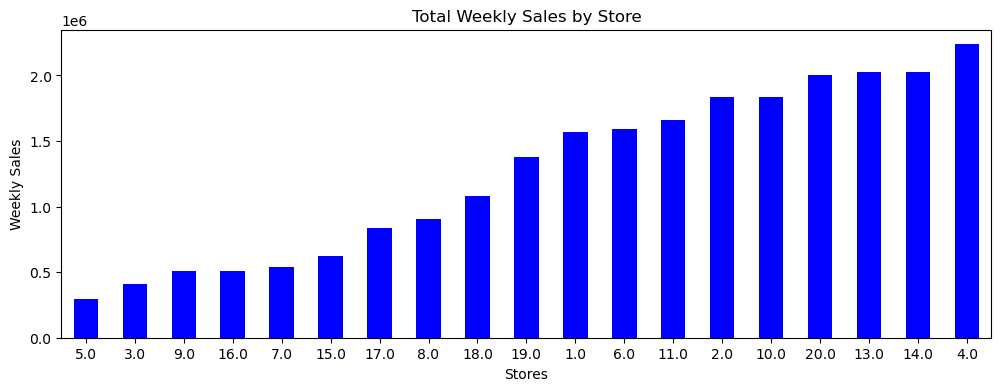

In [17]:
#Store = dataset['Store'].value_counts(normalize=True) * 100
Store = df1.groupby('Store')['Weekly_Sales'].mean().sort_values()

plt.figure(figsize=(12, 4))
Store.plot(kind='bar', color=['blue'])#, 'orange'])
plt.title('Total Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=0) 
plt.show()
#print("Store Sales Distribution in Percentage:")
#print(Store)

On average store 4 has the highest sales followed by Stores 14, 13, 20. It means that some areas has higher seasonal sales.

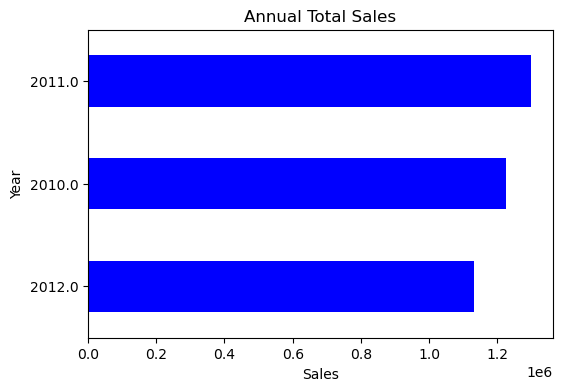

In [18]:
#Year = dataset['Year'].value_counts(normalize=True) * 100
Year = df1.groupby('Year')['Weekly_Sales'].mean().sort_values()

plt.figure(figsize=(6, 4))
Year.plot(kind='barh', color=['blue'])
plt.title('Annual Total Sales')
plt.ylabel('Year')
plt.xlabel('Sales')
plt.xticks(rotation=0) 
plt.show()
#print("Annual Sales Distribution in Percentage:")
#print(Year)

In average, Year 2011 has higher sales than 2010 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.

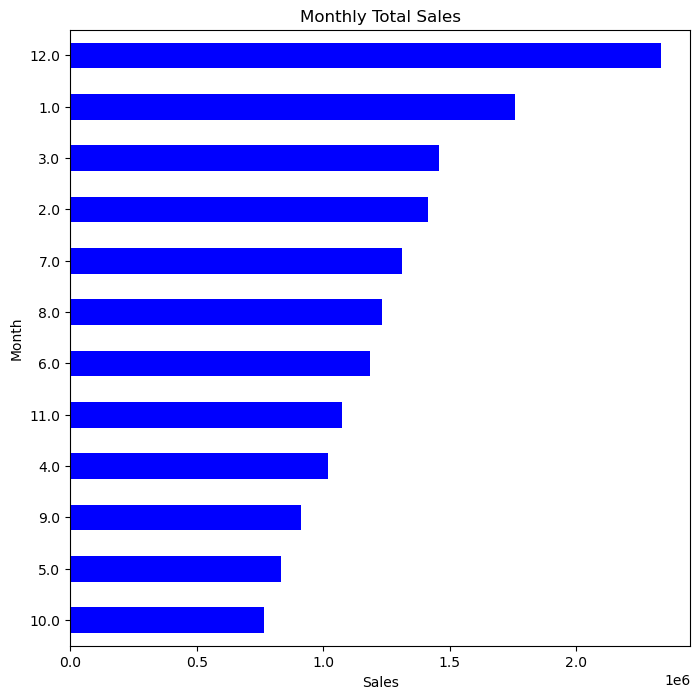

In [19]:
Month = df1.groupby('Month')['Weekly_Sales'].mean().sort_values()

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
Month.plot(kind='barh', color=['blue'])
plt.title('Monthly Total Sales')
plt.ylabel('Month')
plt.xlabel('Sales')
plt.legend().set_visible(False)
plt.show()
#print("Monthly Sales Distribution")
#print(Month)

January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.

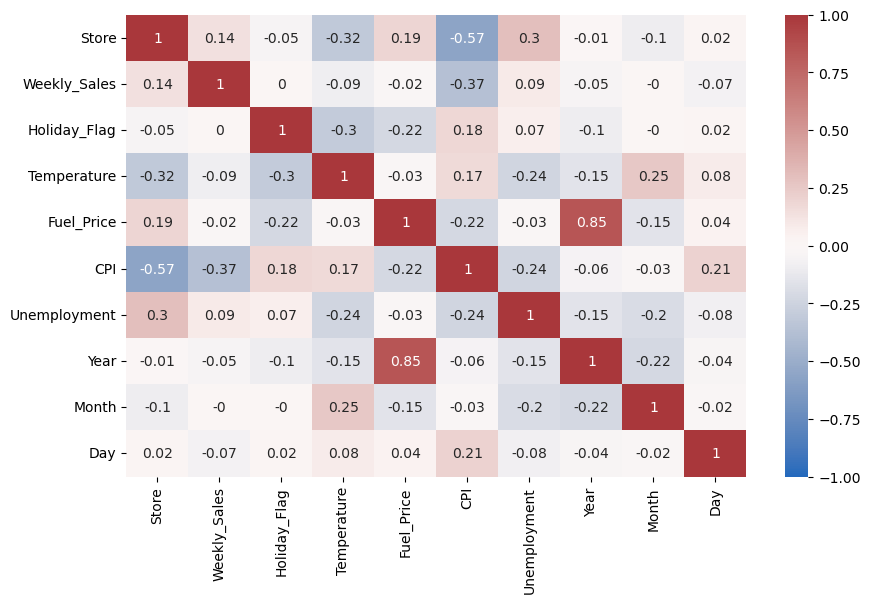

In [20]:
plt.figure(figsize=(10,6))
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_columns.corr().round(2), annot = True, cmap = "vlag", vmin=-1, vmax=1) 
plt.show()
#cmap = "vlag", "PuOr", "coolwarm", "Spectral", "icefire", "YlOrBr"



<Axes: xlabel='Fuel_Price'>

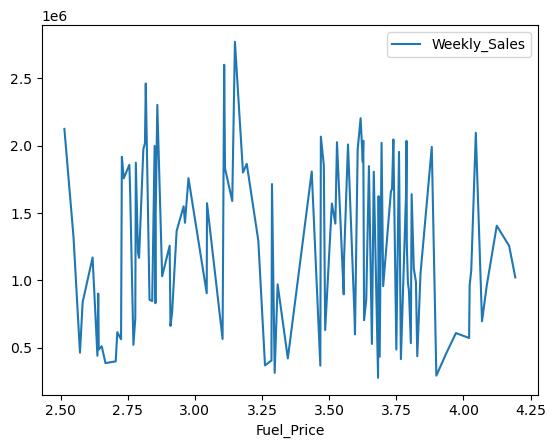

In [21]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

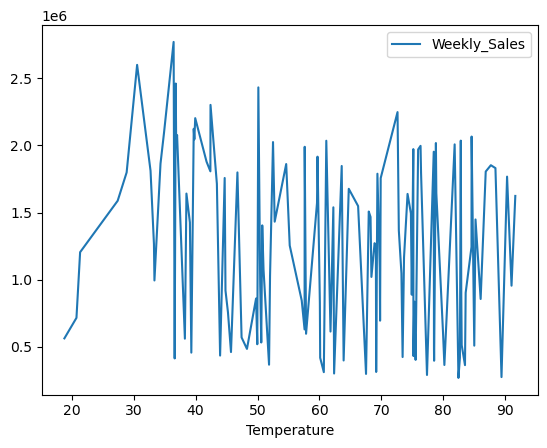

In [22]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

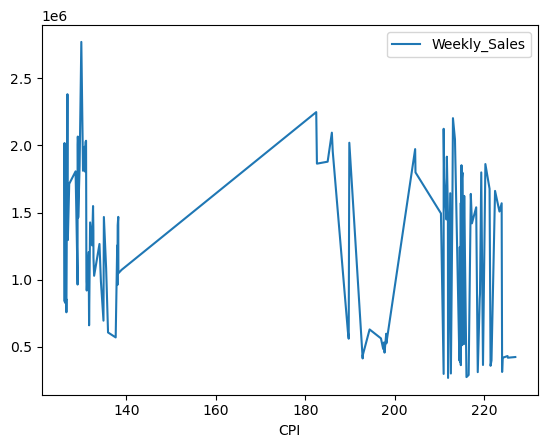

In [23]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

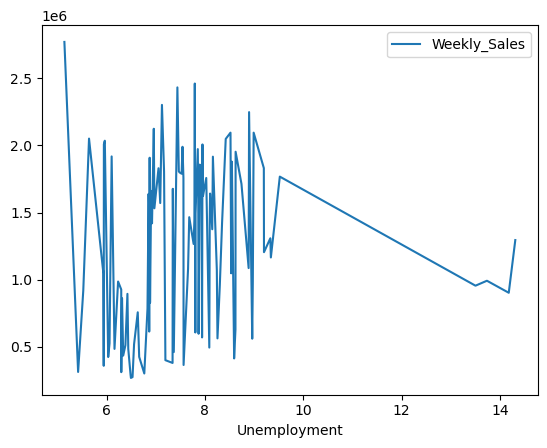

In [24]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

CPI, temperature, unemployment rate and fuel price have no significant pattern on weekly sales.

In [25]:
print("Percentage of missing values: ")
(df1.isnull().sum() / df1.shape[0] *100).sort_values(ascending = False)

Percentage of missing values: 


Holiday_Flag    11.224490
Year            10.204082
Month           10.204082
Day             10.204082
Weekly_Sales     8.163265
Store            0.000000
Temperature      0.000000
Fuel_Price       0.000000
CPI              0.000000
Unemployment     0.000000
dtype: float64

In [26]:
df1 = df1.dropna(subset=["Weekly_Sales"])
df1["Weekly_Sales"].isnull().sum() / df1.shape[0] *100

0.0

In [27]:
# Separate target variable Y from features X

target_variable = ["Weekly_Sales"]

X = df1.drop(target_variable, axis=1)
Y = df1.loc[:, target_variable]

Y.head()


,Weekly_Sales
0,1572117.54
1,1807545.43
2,1644470.66
3,695396.19
4,2203523.20


In [28]:
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,6.0,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0
2,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0
3,15.0,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0
4,20.0,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [30]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ",  X_test.shape)

X_train shape :  (72, 9)
X_test shape :  (18, 9)


In [31]:
numeric_features = ["Temperature", "Fuel_Price", "CPI",	"Unemployment", "Year", "Month", "Day"] 
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

categorical_features = ["Store", "Holiday_Flag"]
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')) ])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)])

In [32]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test) 


### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [33]:
# Train model using Linear regression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Print Metrics
print("R2 score on training set : ", regressor.score(X_train, Y_train))
print("R2 score on test set : ", regressor.score(X_test, Y_test))
print()
print("Mean Absolute Error (MAE) on Train set: ", mean_absolute_error(Y_train, regressor.predict(X_train)))
print("Mean Absolute Error (MAE) on Test set: ", mean_absolute_error(Y_test, regressor.predict(X_test)))
print()
print("Mean Absolute Error (RMSE) on Train set: ", root_mean_squared_error(Y_train, regressor.predict(X_train)))
print("Mean Absolute Error (RMSE) on Test set: ", root_mean_squared_error(Y_test, regressor.predict(X_test)))

R2 score on training set :  0.981876840951674
R2 score on test set :  0.9458432628366747

Mean Absolute Error (MAE) on Train set:  67248.964154048
Mean Absolute Error (MAE) on Test set:  104316.10500404295

Mean Absolute Error (RMSE) on Train set:  90406.6599239205
Mean Absolute Error (RMSE) on Test set:  133767.9414747488


In [35]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_20.0', 'x1_1.0', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']


In [36]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
x0_2.0,3.343421e+05
x0_3.0,-1.278855e+06
x0_4.0,2.426799e+06
x0_5.0,-1.281431e+06
x0_6.0,1.099530e+05
x0_7.0,-5.896025e+05
x0_8.0,-7.396239e+05
x0_9.0,-1.193058e+06
x0_10.0,2.111689e+06
x0_11.0,-1.754015e+05


Individual stores have the highest coefficients, which doesn't really help us understand what external factors impact weekly sales It tells us that stores 5, 3, 9 drive the weekly sales down and we should maybe focus on how to improve that

In [37]:
# Plot coefficients
coefs["Color"] = np.where(coefs["coefficients"]<0, 'red', 'green')
fig = px.bar(coefs["coefficients"], orientation = 'v', title="Features Correlation Coefficients on Weekly Sales with Linear Model")
fig.update_layout(showlegend = False, height=700, width=1000, margin = {'l': 120})
fig.update_traces(marker_color=coefs["Color"])               
fig.show()



In [574]:
coefs.head()

,coefficients,Color
x0_2.0,3.343421e+05,green
x0_3.0,-1.278855e+06,red
x0_4.0,2.426799e+06,green
x0_5.0,-1.281431e+06,red
x0_6.0,1.099530e+05,green


WARNING
Comparison in absolute values
The feature importance is related to the absolute values of the coefficients. Dont forget to compute the absolute value before concluding !

In [38]:
# Compute abs() and sort values
feature_importance = abs(coefs['coefficients']).sort_values()#by = 'coefficients')#, ascending="False")
feature_importance

Unemployment    1.381584e+04
Year            2.659249e+04
Month           2.830350e+04
Temperature     3.866228e+04
Day             4.427601e+04
Fuel_Price      6.564051e+04
x1_1.0          8.433491e+04
x0_6.0          1.099530e+05
x0_11.0         1.754015e+05
x0_2.0          3.343421e+05
x0_20.0         5.175014e+05
x0_7.0          5.896025e+05
x0_16.0         5.968606e+05
x0_8.0          7.396239e+05
x0_15.0         7.677393e+05
CPI             7.837629e+05
x0_17.0         8.692964e+05
x0_18.0         1.126259e+06
x0_14.0         1.133116e+06
x0_9.0          1.193058e+06
x0_3.0          1.278855e+06
x0_5.0          1.281431e+06
x0_19.0         1.485815e+06
x0_10.0         2.111689e+06
x0_13.0         2.173607e+06
x0_4.0          2.426799e+06
Name: coefficients, dtype: float64

In [39]:

# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h', title="Features importance on Weekly Sales for the Linear Model")
fig.update_layout(showlegend = False, height=1000, width=800, margin = {'l': 120}) # to avoid cropping of column names               
fig.show()

In [40]:
scores_df = pd.DataFrame(columns = ['model', 'set', 'R2-Score', 'MAE', 'RMSE'])

In [41]:

scores_df = scores_df._append({'model': 'Linear Reg', 'set': 'train', 'R2-Score': regressor.score(X_train, Y_train), 'MAE': mean_absolute_error(Y_train, regressor.predict(X_train)), 'RMSE': root_mean_squared_error(Y_train, regressor.predict(X_train))}, ignore_index = True)
scores_df = scores_df._append({'model': 'Linear Reg', 'set': 'test',  'R2-Score': regressor.score(X_test, Y_test),   'MAE': mean_absolute_error(Y_test, regressor.predict(X_test)),   'RMSE': root_mean_squared_error(Y_test, regressor.predict(X_test))},   ignore_index = True)

scores_df

,model,set,R2-Score,MAE,RMSE
0,Linear Reg,train,0.981877,67248.964154,90406.659924
1,Linear Reg,test,0.945843,104316.105004,133767.941475


Use cross validation to check my model overall performance : display the average score and the standard deviation. The score of my Linear Reg Model varies beteen 0.8 and 1

In [42]:
from sklearn.model_selection import cross_val_score
# Cross val score with cv = 25
scores_cv = cross_val_score(regressor, X_train, Y_train, cv=16)

print("Cross Val Mean : ", scores_cv.mean())
print("Cross Val STD : ",  scores_cv.std())

Cross Val Mean :  0.9196122639520518
Cross Val STD :  0.13127232564371258


Use cross validation to check my model overall performance : display the average score and the standard deviation. The score of my Linear Reg Model varies beteen 0.8 and 1. That's good

In [43]:
ridge = Ridge()
ridge.fit(X_train, Y_train)

# Print R^2 scores
print("R2 score on training set : ", ridge.score(X_train, Y_train))
print("R2 score on test set : ",     ridge.score(X_test,  Y_test))

# Predictions on training set
Y_train_pred = ridge.predict(X_train)
Y_test_pred  = ridge.predict(X_test)

scores_df = scores_df._append({'model': 'Ridge', 'set': 'train', 'R2-Score': ridge.score(X_train, Y_train), 'MAE': mean_absolute_error(Y_train, ridge.predict(X_train)), 'RMSE': root_mean_squared_error(Y_train, ridge.predict(X_train))}, ignore_index = True)
scores_df = scores_df._append({'model': 'Ridge', 'set': 'test',  'R2-Score': ridge.score(X_test, Y_test),   'MAE': mean_absolute_error(Y_test,  ridge.predict(X_test)), 'RMSE': root_mean_squared_error(Y_test, ridge.predict(X_test))},   ignore_index = True)
scores_df

R2 score on training set :  0.9261169613894649
R2 score on test set :  0.8738396216148303


,model,set,R2-Score,MAE,RMSE
0,Linear Reg,train,0.981877,67248.964154,90406.659924
1,Linear Reg,test,0.945843,104316.105004,133767.941475
2,Ridge,train,0.926117,143751.151454,182539.076012
3,Ridge,test,0.873840,155768.115886,204167.819119


In [740]:
scores_ridge = cross_val_score(ridge, X_train, Y_train, cv=16)
print('The cross-validated R2-score is : ', scores_ridge.mean())
print('The standard deviation is : ', scores_ridge.std())

The cross-validated R2-score is :  0.7942636274841974
The standard deviation is :  0.13308607654124946


In [44]:
lasso = Lasso()
lasso.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso.score(X_train, Y_train))
print("R2 score on test set : ", lasso.score(X_test, Y_test))

# Predictions on training set
Y_train_pred = lasso.predict(X_train)
# Predictions on test set
Y_test_pred = lasso.predict(X_test)

scores_df = scores_df._append({'model': 'Lasso', 'set': 'train', 'R2-Score': lasso.score(X_train, Y_train), 'MAE': mean_absolute_error(Y_train, lasso.predict(X_train)), 'RMSE': root_mean_squared_error(Y_train, lasso.predict(X_train))}, ignore_index = True)
scores_df = scores_df._append({'model': 'Lasso', 'set': 'test',  'R2-Score': lasso.score(X_test, Y_test),   'MAE': mean_absolute_error(Y_test,  lasso.predict(X_test)), 'RMSE': root_mean_squared_error(Y_test, lasso.predict(X_test))},  ignore_index = True)
scores_df

R2 score on training set :  0.9815746222239242
R2 score on test set :  0.9522183752642499


/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.892e+11, tolerance: 3.247e+09



,model,set,R2-Score,MAE,RMSE
0,Linear Reg,train,0.981877,67248.964154,90406.659924
1,Linear Reg,test,0.945843,104316.105004,133767.941475
2,Ridge,train,0.926117,143751.151454,182539.076012
3,Ridge,test,0.873840,155768.115886,204167.819119
4,Lasso,train,0.981575,69298.411571,91157.346350
5,Lasso,test,0.952218,100854.899641,125648.195224


In [45]:
scores_lasso = cross_val_score(lasso, X_train, Y_train, cv=16)
print('The cross-validated R2-score is : ', scores_lasso.mean())
print('The standard deviation is : ', scores_lasso.std())


The cross-validated R2-score is :  0.9494762549381603
The standard deviation is :  0.027372846010928945


/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e+11, tolerance: 3.002e+09

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+11, tolerance: 3.038e+09

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+11, tolerance: 3.112e+09

/Users/wenhaj

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [46]:
# Perform grid search
ridge_gs = Ridge()
# Grid of values to be tested
params = {'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006],}
GS_ridge = GridSearchCV(ridge_gs, param_grid = params, cv = 16) # cv : the number of folds to be used for CV
GS_ridge.fit(X_train, Y_train)

# print hyperparameters
print("Best hyperparameters : ", GS_ridge.best_params_)
print("Best R2 score : ", GS_ridge.best_score_)
print()

# Print R^2 scores
print("R2 score on training set : ", GS_ridge.score(X_train, Y_train))
print("R2 score on test set : ", GS_ridge.score(X_test, Y_test))

Best hyperparameters :  {'alpha': 0.002}
Best R2 score :  0.9498172993427529

R2 score on training set :  0.9815983028814524
R2 score on test set :  0.9520001808849607


Here, we can see that the model's generalized performance was improved by using a Ridge regression and tuning the value of the regularization strength. Indeed, without regularization, the R2-score typically varies between 0.7 and 0.9, whereas with a regularized model we achieve a test score greater than 0.9 

In [47]:

scores_df = scores_df._append({'model': 'Ridge_GS', 'set': 'train', 'R2-Score': GS_ridge.score(X_train, Y_train), 'MAE': mean_absolute_error(Y_train, GS_ridge.predict(X_train)), 'RMSE': root_mean_squared_error(Y_train, GS_ridge.predict(X_train))}, ignore_index = True)
scores_df = scores_df._append({'model': 'Ridge_GS', 'set': 'test',  'R2-Score': GS_ridge.score(X_test, Y_test),   'MAE': mean_absolute_error(Y_test,  GS_ridge.predict(X_test)), 'RMSE': root_mean_squared_error(Y_test, GS_ridge.predict(X_test))},  ignore_index = True)
scores_df

,model,set,R2-Score,MAE,RMSE
0,Linear Reg,train,0.981877,67248.964154,90406.659924
1,Linear Reg,test,0.945843,104316.105004,133767.941475
2,Ridge,train,0.926117,143751.151454,182539.076012
3,Ridge,test,0.873840,155768.115886,204167.819119
4,Lasso,train,0.981575,69298.411571,91157.346350
5,Lasso,test,0.952218,100854.899641,125648.195224
6,Ridge_GS,train,0.981598,69153.766405,91098.748910
7,Ridge_GS,test,0.952000,101083.447402,125934.754157


In [48]:
# Perform grid search
lasso_gs = Lasso()
# Grid of values to be tested
params = {'alpha': [ 5, 6, 7, 8]}
Lasso_GS = GridSearchCV(lasso_gs, param_grid = params, cv = 16) # cv : the number of folds to be used for CV
Lasso_GS.fit(X_train, Y_train)
print()
print("Best hyperparameters : ", Lasso_GS.best_params_)
print("Best R2 score : ", Lasso_GS.best_score_)

# Print R^2 scores
print("R2 score on training set : ", Lasso_GS.score(X_train, Y_train))
print("R2 score on test set : ", Lasso_GS.score(X_test, Y_test))

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+11, tolerance: 3.002e+09

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.274e+11, tolerance: 3.038e+09

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+11, tolerance: 3.112e+09

/Users/wenhaj


Best hyperparameters :  {'alpha': 6}
Best R2 score :  0.9495568510101301
R2 score on training set :  0.9815508976406842
R2 score on test set :  0.9524584125007813


/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+11, tolerance: 3.021e+09

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.867e+11, tolerance: 3.122e+09

/Users/wenhajindomeni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+11, tolerance: 3.065e+09

/Users/wenhaj

In [49]:

scores_df = scores_df._append({'model': 'Lasso_GS', 'set': 'train', 'R2-Score': Lasso_GS.score(X_train, Y_train), 'MAE': mean_absolute_error(Y_train, Lasso_GS.predict(X_train)), 'RMSE': root_mean_squared_error(Y_train, Lasso_GS.predict(X_train))}, ignore_index = True)
scores_df = scores_df._append({'model': 'Lasso_GS', 'set': 'test',  'R2-Score': Lasso_GS.score(X_test, Y_test),   'MAE': mean_absolute_error(Y_test,  Lasso_GS.predict(X_test)), 'RMSE': root_mean_squared_error(Y_test, Lasso_GS.predict(X_test))},  ignore_index = True)

In [50]:
#scores_df["R2-Score-plot"] = scores_df["R2-Score"] - 0.9
scores_df = scores_df.sort_values(by = ['set', 'R2-Score'], ascending = True)
px.bar(scores_df, x = "model", y = 'R2-Score', color = 'set', barmode = 'group', width = 900)

In [51]:
scores_df = scores_df.sort_values(by = ['set', 'MAE'], ascending = True)
px.bar(scores_df, x = "model", y = 'MAE', color = 'set', barmode = 'group', width = 900)

In [52]:
scores_df = scores_df.sort_values(by = ['set', 'RMSE'], ascending = True)
px.bar(scores_df, x = "model", y = 'RMSE', color = 'set', barmode = 'group', width = 900)

In [53]:
scores_df

,model,set,R2-Score,MAE,RMSE
9,Lasso_GS,test,0.952458,100695.712779,125332.192790
5,Lasso,test,0.952218,100854.899641,125648.195224
7,Ridge_GS,test,0.952000,101083.447402,125934.754157
1,Linear Reg,test,0.945843,104316.105004,133767.941475
3,Ridge,test,0.873840,155768.115886,204167.819119
0,Linear Reg,train,0.981877,67248.964154,90406.659924
6,Ridge_GS,train,0.981598,69153.766405,91098.748910
4,Lasso,train,0.981575,69298.411571,91157.346350
8,Lasso_GS,train,0.981551,69414.733695,91216.014736
2,Ridge,train,0.926117,143751.151454,182539.076012


In [55]:
scores_test = scores_df[scores_df["set"] == "test"]
scores_train = scores_df[scores_df["set"] == "train"]


In [56]:
EMC = scores_test.copy()
EMC.index = ['Lasso_GS','Lasso','Ridge_GS','Linear Reg','Rigde']
EMC

,model,set,R2-Score,MAE,RMSE
Lasso_GS,Lasso_GS,test,0.952458,100695.712779,125332.192790
Lasso,Lasso,test,0.952218,100854.899641,125648.195224
Ridge_GS,Ridge_GS,test,0.952000,101083.447402,125934.754157
Linear Reg,Linear Reg,test,0.945843,104316.105004,133767.941475
Rigde,Ridge,test,0.873840,155768.115886,204167.819119


In [57]:
EMC1 = scores_train.copy()
EMC1.index = ['Lasso_GS','Lasso','Ridge_GS','Linear Reg','Rigde']
EMC1

,model,set,R2-Score,MAE,RMSE
Lasso_GS,Linear Reg,train,0.981877,67248.964154,90406.659924
Lasso,Ridge_GS,train,0.981598,69153.766405,91098.748910
Ridge_GS,Lasso,train,0.981575,69298.411571,91157.346350
Linear Reg,Lasso_GS,train,0.981551,69414.733695,91216.014736
Rigde,Ridge,train,0.926117,143751.151454,182539.076012


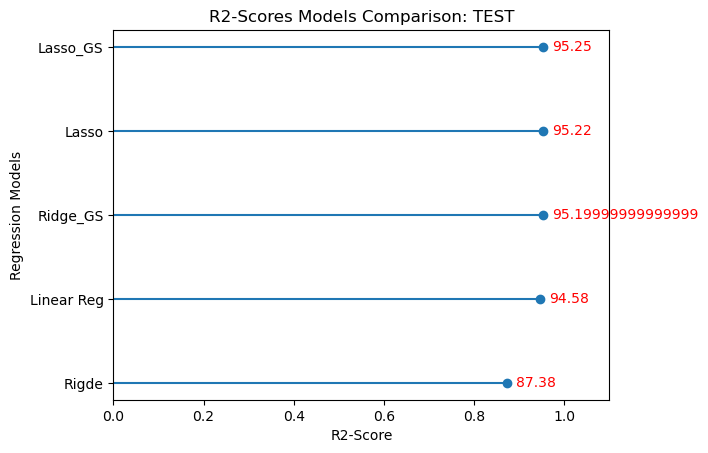

In [58]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['R2-Score'].sort_values(ascending=True), 4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Models Comparison: TEST')
plt.xlabel('R2-Score')
plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v + 0.02, i - 0.05, str(v*100), color='red')
plt.xlim([0,1.1])
plt.show()

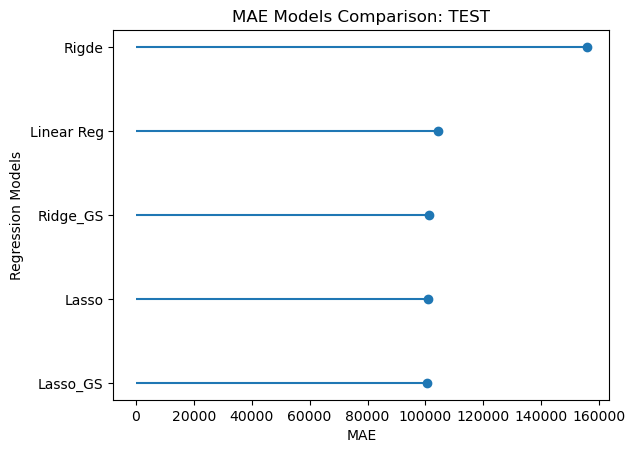

In [59]:

MAE = EMC['MAE'].sort_values(ascending=True)
plt.hlines(y=MAE.index, xmin=0, xmax=MAE.values)
plt.plot(MAE.values, MAE.index,'o')
plt.title('MAE Models Comparison: TEST')
plt.xlabel('MAE')
plt.ylabel('Regression Models')
plt.show()

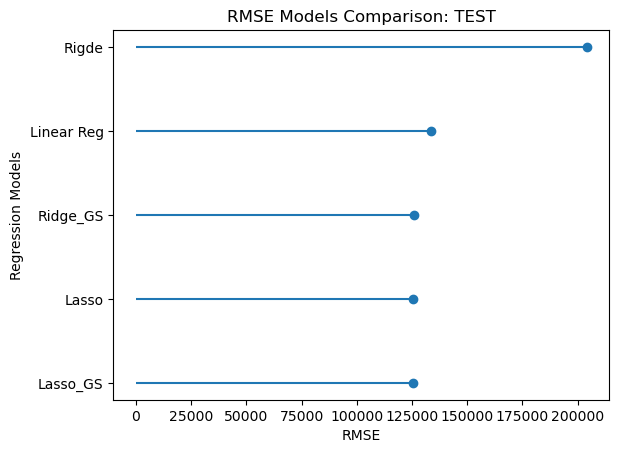

In [60]:
RMSE = EMC['RMSE'].sort_values(ascending=True)
plt.hlines(y=RMSE.index, xmin=0, xmax=RMSE.values)
plt.plot(RMSE.values, RMSE.index,'o')
plt.title('RMSE Models Comparison: TEST')
plt.xlabel('RMSE')
plt.ylabel('Regression Models')
plt.show()

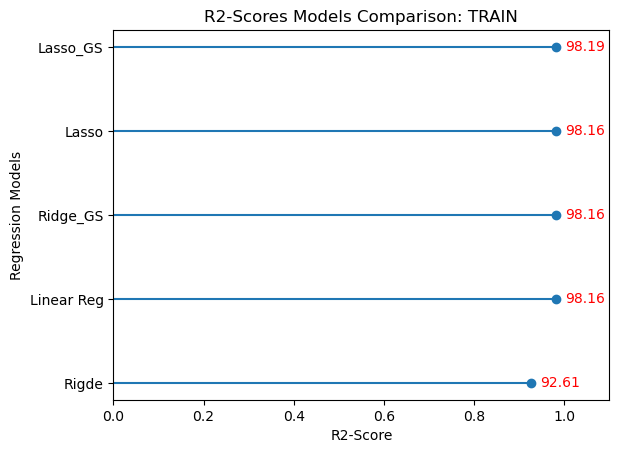

In [61]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC1['R2-Score'].sort_values(ascending=True), 4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Models Comparison: TRAIN')
plt.xlabel('R2-Score')
plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v + 0.02, i - 0.05, str(v*100), color='red')
plt.xlim([0,1.1])
plt.show()

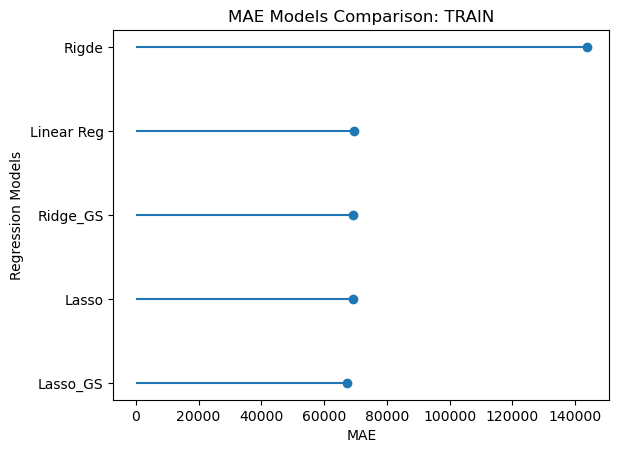

In [62]:
MAE1 = EMC1['MAE'].sort_values(ascending=True)
plt.hlines(y=MAE1.index, xmin=0, xmax=MAE1.values)
plt.plot(MAE1.values, MAE1.index,'o')
plt.title('MAE Models Comparison: TRAIN')
plt.xlabel('MAE')
plt.ylabel('Regression Models')
plt.show()

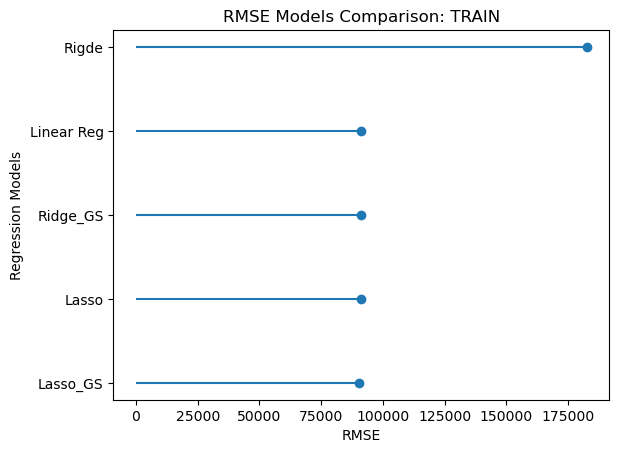

In [63]:
RMSE1 = EMC1['RMSE'].sort_values(ascending=True)
plt.hlines(y=RMSE1.index, xmin=0, xmax=RMSE1.values)
plt.plot(RMSE1.values, RMSE1.index,'o')
plt.title('RMSE Models Comparison: TRAIN')
plt.xlabel('RMSE')
plt.ylabel('Regression Models')
plt.show()

In [64]:

# Create a pandas DataFrame
coef_lasso_gs = pd.DataFrame(index = column_names, data = Lasso_GS.best_estimator_.coef_, columns=["coefficients"])
coef_lasso_gs.head()

,coefficients
x0_2.0,3.335145e+05
x0_3.0,-1.232711e+06
x0_4.0,1.453357e+06
x0_5.0,-1.282298e+06
x0_6.0,1.104969e+05


In [65]:
fig = px.bar(coef_lasso_gs["coefficients"], orientation = 'v', title="Features Correlation Coefficients on Weekly Sales with best Lasso Model")
fig.update_layout(showlegend = False, height=700, width=1000,
                  margin = {'l': 120})
                  #yaxis=dict(range=[-2500000, 2500000], tickvals=list(np.arange(-2500000, 2500000, 500000))))

fig.update_traces(marker_color=coefs["Color"])
                
fig.show()

In [66]:
# Compute abs() and sort values
feature_importance = abs(coef_lasso_gs['coefficients']).sort_values()#by = 'coefficients')#, ascending="False")
feature_importance

Year            4.212978e+03
Unemployment    2.080136e+04
Month           3.399823e+04
Temperature     4.054407e+04
Day             4.469528e+04
Fuel_Price      6.377583e+04
x0_17.0         7.745264e+04
x1_1.0          9.493890e+04
x0_11.0         9.573794e+04
x0_6.0          1.104969e+05
x0_15.0         1.232675e+05
x0_18.0         2.542183e+05
x0_2.0          3.335145e+05
CPI             3.582327e+05
x0_20.0         4.463415e+05
x0_19.0         6.021281e+05
x0_8.0          7.186860e+05
x0_14.0         8.069106e+05
x0_7.0          8.302279e+05
x0_16.0         8.572997e+05
x0_10.0         1.134224e+06
x0_9.0          1.176162e+06
x0_13.0         1.207294e+06
x0_3.0          1.232711e+06
x0_5.0          1.282298e+06
x0_4.0          1.453357e+06
Name: coefficients, dtype: float64

In [67]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h', title="Features importance on Weekly Sales for Best Lasso Model")

fig.update_layout(showlegend = False, height=1000, width=800,
                  margin = {'l': 120}) # to avoid cropping of column names
                
fig.show()

In [68]:
# Predictions on test set
print("Predictions...")
Y_train_pred = Lasso_GS.predict(X_train)
Y_test_pred = Lasso_GS.predict(X_test)
#print(Y_test_pred)
#print(Y_train_pred)

Predictions...


In [69]:
Y_train_pred.shape

(72,)

In [ ]:
#plt.subplot(1,2,1)
#sns.distplot((Y_train - Y_train_pred))
#plt.title('Error Terms')          
#plt.xlabel('Errors') 

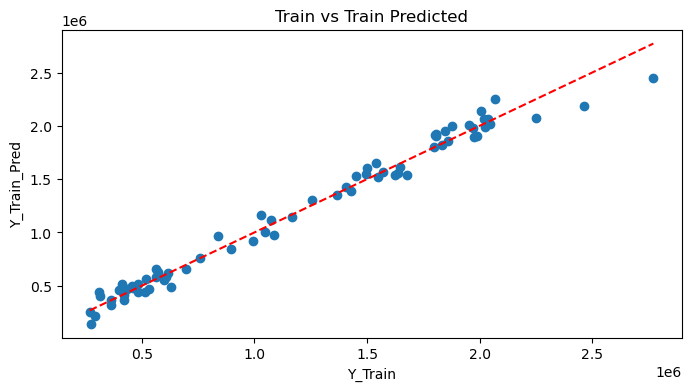

In [70]:
#Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=[8,4])
#plt.subplot(1,2,2)
plt.scatter(Y_train, Y_train_pred, label='Prediction')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')
plt.title('Train vs Train Predicted')         
plt.xlabel('Y_Train')                       
plt.ylabel('Y_Train_Pred')                       
    
plt.show()

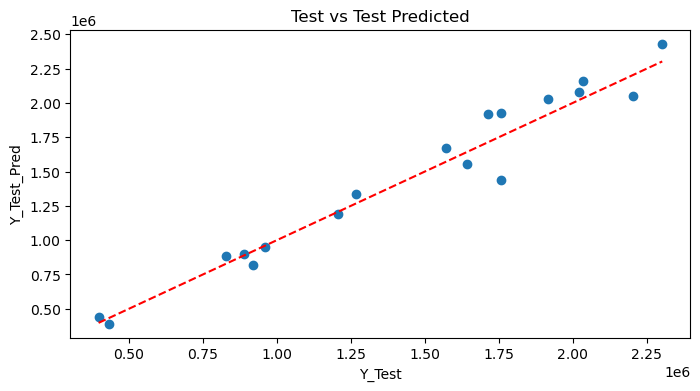

In [71]:

plt.figure(figsize=[8,4])
plt.scatter(Y_test, Y_test_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title('Test vs Test Predicted')         
plt.xlabel('Y_Test')                       
plt.ylabel('Y_Test_Pred')                       
    
plt.show()

Here are some of the key outcomes of the project:

The Dataset was quiet small. Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
It is safe to use multiple regression algorithm performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable.

Ridge and Lasso are both regularization techniques that allow to constrain the values of the model's coefficients. 
When the regularization strength α increases, the contraint becomes more restrictive and results in an increase in the model's bias.

With Ridge regularization, all the model's coefficients are shrinked, 
while in Lasso, some coefficients are completely ignored. 
That's why Lasso can be seen as an automated feature selection method.